## 値の逆変換を行い取引量と価格のデータを生成する

In [16]:

import json

with open("data/all_ans_data.json") as f:
    gene_data = json.load(f)

with open("data/all_formatted_pre_data.json") as f:
    coin_data = json.load(f)

In [17]:
gene_data

{'0x': {'volume': [-0.06420335415838016,
   1.0250134567315796,
   -0.11238715883041912,
   -0.8788978465522979,
   -0.0125096951308386,
   0.48548914725126896,
   -0.2869742689778503,
   0.311979808191819,
   -0.0052835829140580335,
   0.22399399148080093,
   -0.14974200417132977,
   0.14696156774951494,
   -0.0402887540947103,
   0.043563345820753975,
   -0.2135051738014218,
   0.22439420778220762,
   -0.45870973214307187,
   0.4006026312063393,
   -0.1038634527112512,
   -0.6676661055869609,
   0.053612051000818846,
   -0.06189617341432563,
   0.5471498078191299,
   -0.15165419218435336,
   -0.4732125237756351,
   0.0005602672105784793,
   0.3197570031765278,
   1.0940208670616418,
   -2.2559722239261024,
   -1.261471074969675,
   0.20858945187759642,
   1.0875057482568293,
   1.0076533819929585,
   0.18582748897237375,
   -0.08373966486831222,
   -0.33817391904436045,
   -0.2626100787323794,
   0.10626846434856052,
   0.5005803161605531,
   -0.5432898245874644,
   -0.10355149464073

In [22]:
import math
from collections import defaultdict

save_data = defaultdict(list)

for key, value in gene_data.items():
    if value != []:
        volume_ave = sum(value["volume"]) / len(value["volume"])
        price_ave = sum(value["price"]) / len(value["price"])
        reversed_volume = [coin_data[key]["volume"][-1]]
        reversed_price = [coin_data[key]["price"][-1]]
        for i in range(len(value["price"])):
            reversed_volume_value = math.exp(value["volume"][i]-volume_ave) * reversed_volume[i]
            reversed_volume.append(reversed_volume_value)
            reversed_price_value = math.exp(value["price"][i]-price_ave) * reversed_price[i]
            reversed_price.append(reversed_price_value)
        save_data[key] = {"volume": reversed_volume, "price": reversed_price}

In [23]:
len(save_data)

302

/Users/hiroki/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroki/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroki/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroki/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


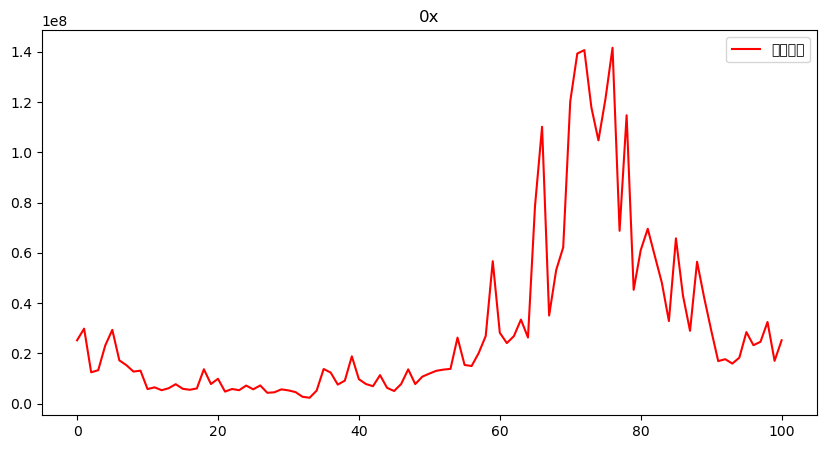

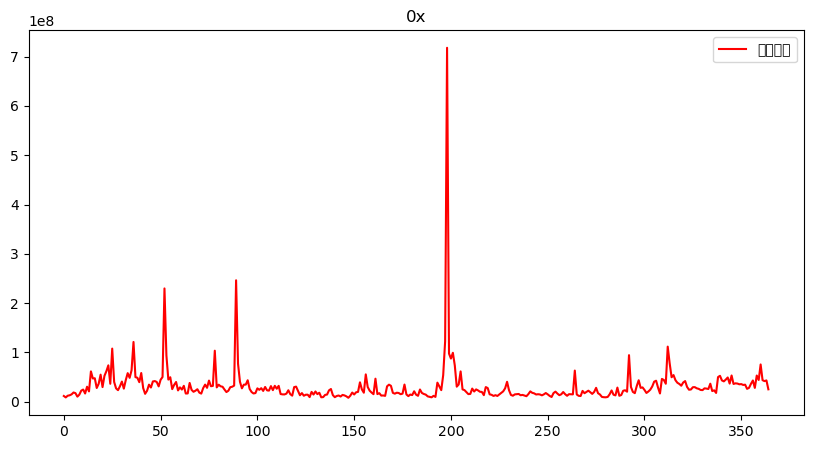

In [24]:
import matplotlib.pyplot as plt

# 予測結果のプロット
plt.figure(figsize=(10, 5))
plt.plot([i for i in range(len(save_data["1inch"]["volume"]))], save_data["1inch"]["volume"], label='予測分散', color='red')
plt.title("0x")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot([i for i in range(len(coin_data["1inch"]["volume"]))], coin_data["1inch"]["volume"], label='予測分散', color='red')
plt.title("0x")
plt.legend()
plt.show()

In [25]:
with open("data/all_gene_data.json", "w") as file:
    json.dump(save_data, file, indent=4)